# 1. Load And Explore Dataset

The initial step involves loading and exploring the dataset to understand its structure, dimensions, and key attributes. This helps identify what kind of data we are working with.

In [1]:
import pandas as pd

In [106]:
# Load Dataset
df = pd.read_csv("global_housing_market.csv")

# View first few rows
print(df.head())

  Country  Year  House Price Index  Rent Index  Affordability Ratio  \
0     USA  2015         117.454012  116.550001             9.587945   
1     USA  2016         150.807258   51.440915            11.729189   
2     USA  2017         123.194502   70.386040             8.506676   
3     USA  2018         131.423444   91.469020             3.418054   
4     USA  2019         110.461377   56.837048             9.158097   

   Mortgage Rate (%)  Inflation Rate (%)  GDP Growth (%)  \
0           4.493292            1.514121       -0.752044   
1           5.662213            1.880204       -0.545400   
2           2.197469            2.398940        0.930895   
3           4.537724            1.608407       -1.479587   
4           3.700762            1.293249        1.961415   

   Population Growth (%)  Urbanization Rate (%)  Construction Index  
0              -0.796707              85.985284          118.089201  
1              -0.358084              69.127267          111.980515  
2 

In [6]:
# Display basic stastics
print(df.describe())

              Year  House Price Index  Rent Index  Affordability Ratio  \
count   200.000000         200.000000  200.000000           200.000000   
mean   2019.500000         130.381022   83.048370             7.237768   
std       2.879489          28.752229   21.439858             2.576085   
min    2015.000000          80.552212   50.354311             3.041688   
25%    2017.000000         104.142562   60.466671             5.034207   
50%    2019.500000         129.193653   83.721711             7.375697   
75%    2022.000000         157.127098  100.604665             9.276196   
max    2024.000000         179.971767  119.855388            11.879671   

       Mortgage Rate (%)  Inflation Rate (%)  GDP Growth (%)  \
count         200.000000          200.000000      200.000000   
mean            4.150621            3.649756        2.133722   
std             1.380222            1.881938        2.413270   
min             1.537814            0.532110       -1.921833   
25%          

# 2. Data Cleaning & Preprocessing

Ensuring the dataset is clean and organized is crucial for accurate analysis. Checking for missing values, duplicates, and correct data types.

In [7]:
# Check for any missing value
missing_values = df.isnull().sum()
print("Missing Values: \n", missing_values)

Missing Values: 
 Country                  0
Year                     0
House Price Index        0
Rent Index               0
Affordability Ratio      0
Mortgage Rate (%)        0
Inflation Rate (%)       0
GDP Growth (%)           0
Population Growth (%)    0
Urbanization Rate (%)    0
Construction Index       0
dtype: int64


In [8]:
# Check for duplicates
duplicates = df.duplicated().sum()
print("Duplicate Rows:", duplicates)

Duplicate Rows: 0


In [10]:
# Check for data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                200 non-null    object 
 1   Year                   200 non-null    int64  
 2   House Price Index      200 non-null    float64
 3   Rent Index             200 non-null    float64
 4   Affordability Ratio    200 non-null    float64
 5   Mortgage Rate (%)      200 non-null    float64
 6   Inflation Rate (%)     200 non-null    float64
 7   GDP Growth (%)         200 non-null    float64
 8   Population Growth (%)  200 non-null    float64
 9   Urbanization Rate (%)  200 non-null    float64
 10  Construction Index     200 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 17.3+ KB
None


In [12]:
print("Data Cleaning Completed :) ")

Data Cleaning Completed :) 


# 3. Data Validation (Ensure Accuracy & Consistency)

Validation is important to confirm the accuracy of data. Techniques like outlier detection using box plots or Z-scores help identify anomalies that may distort the analysis. By validating data consistency, we can ensure trustworthy results and meaningful interpretations.

Text(0.5, 1.0, 'Outliers Detection in Key Housing Metrics')

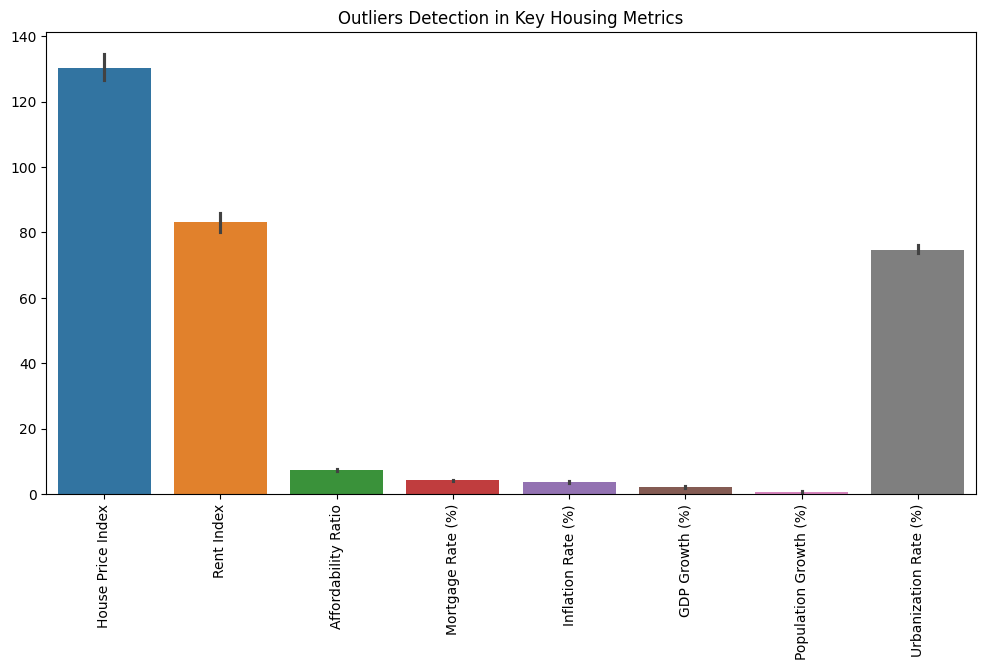

In [17]:
# Check for Outliers (Barplot Method)

import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots for key metrics
plt.figure(figsize = (12,6))
numeric_cols = ["House Price Index", "Rent Index", "Affordability Ratio", "Mortgage Rate (%)",
                "Inflation Rate (%)", "GDP Growth (%)", "Population Growth (%)", "Urbanization Rate (%)"]
sns.barplot(data = df[numeric_cols])
plt.xticks(rotation = 90)
plt.title("Outliers Detection in Key Housing Metrics")

In [19]:
# Another method - Detect Outliners Using Z-Score
from scipy import stats

# Compute Z-scores for outlier detection
z_scores = stats.zscore(df[numeric_cols])
outliers = (z_scores < 3).sum()

print("Outlier Count Per Column:\n", outliers)

Outlier Count Per Column:
 House Price Index        200
Rent Index               200
Affordability Ratio      200
Mortgage Rate (%)        200
Inflation Rate (%)       200
GDP Growth (%)           200
Population Growth (%)    200
Urbanization Rate (%)    200
dtype: int64


# 4. Data Governance (Integrity & Compliance Checks)

This step is about maintaining data integrity and adhering to standards. We verify formats, ensure yearly completeness for all countries, and confirm that values fall within expected ranges. This guarantees the data meets project standards and supports robust decision-making.

In [20]:
# Check Data Types & Format Consistency
print("Data Types:\n", df.dtypes)

Data Types:
 Country                   object
Year                       int64
House Price Index        float64
Rent Index               float64
Affordability Ratio      float64
Mortgage Rate (%)        float64
Inflation Rate (%)       float64
GDP Growth (%)           float64
Population Growth (%)    float64
Urbanization Rate (%)    float64
Construction Index       float64
dtype: object


In [23]:
# Ensuring Yearly Data Completeness
# Validate that each country has data for all expected years
expected_years = set(range(2015, 2025))
missing_years = {country: expected_years - set(df[df["Country"] == country]["Year"]) for country in df["Country"].unique()}
print("Missing Years Per Country:", missing_years)


Missing Years Per Country: {'USA': set(), 'Canada': set(), 'UK': set(), 'Germany': set(), 'France': set(), 'Italy': set(), 'Spain': set(), 'Australia': set(), 'India': set(), 'China': set(), 'Japan': set(), 'Brazil': set(), 'South Korea': set(), 'Mexico': set(), 'South Africa': set(), 'Russia': set(), 'Netherlands': set(), 'Sweden': set(), 'Switzerland': set(), 'UAE': set()}


# 5. Data Visualization (Trends & Correlation)

Visualization brings the data to life, helping to uncover hidden trends and relationships:

- Line plots reveal housing price trends over time.

- Heatmaps highlight correlations between features like GDP Growth and Inflation Rate.

- Box plots show the distribution of mortgage rates across countries. These insights support informed analysis and strategic forecasting.

- Regression plot demonstrates how population growth influences urbanization rates.

- Scatter plot showcases the relationship between housing affordability and inflation.

- Bar plot identifies the top-performing housing markets based on year-over-year (YoY) price growth.

- Another line plots illustrates the housing price index forecast for the top growing countries over multiple years, based on the computed Year-over-Year (YoY) growth rates.


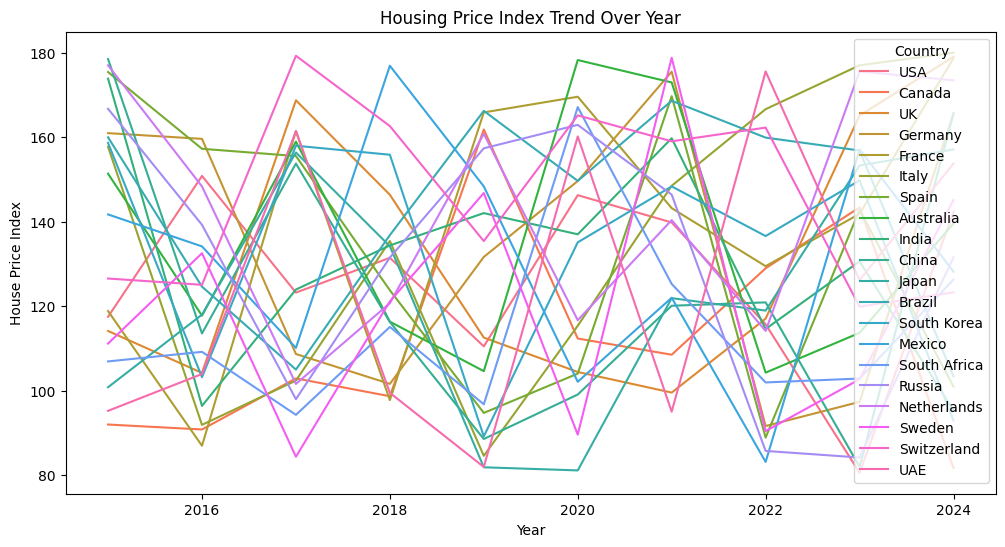

In [28]:
# A. Housing Price Trends Over Time

import matplotlib.pyplot as plt
import seaborn as sns

# Line plot for housing price index over the years
plt.figure (figsize = (12,6))
sns.lineplot (x = df["Year"], y = df["House Price Index"], hue = df["Country"])
plt.title ("Housing Price Index Trend Over Year")
plt.xlabel ("Year")
plt.ylabel ("House Price Index")
plt.legend (title = "Country")
plt.show()

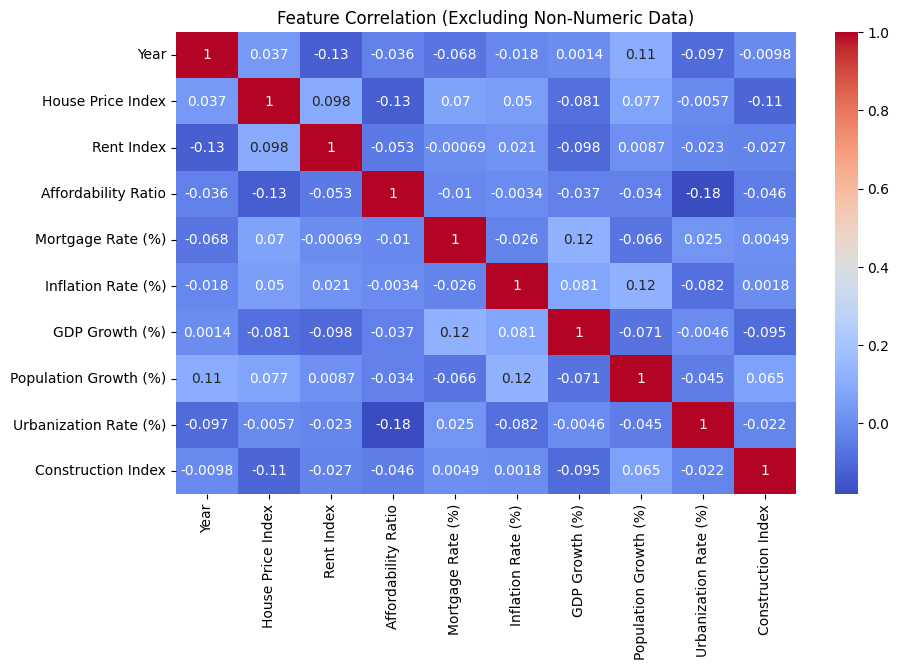

In [35]:
# B. Correlation Between Economics Factors

# Select only numerical columns for correlation analysis
numeric_cols2 = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_cols2.corr()

# Heatmap Visualization
plt.figure (figsize = (10,6))
sns.heatmap (correlation_matrix, annot = True, cmap = "coolwarm")
plt.title("Feature Correlation (Excluding Non-Numeric Data)")
plt.show()

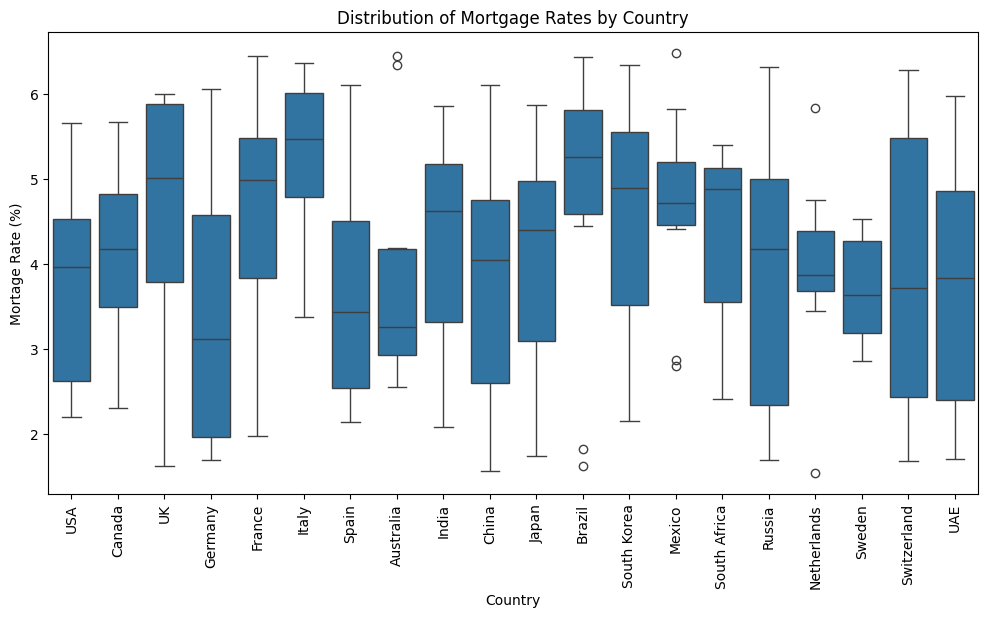

In [41]:
# C. Distribution of Mortgage Rates

plt.figure (figsize = (12, 6))
sns.boxplot (x = df["Country"], y = df["Mortgage Rate (%)"])
plt.xticks (rotation = 90)
plt.title ("Distribution of Mortgage Rates by Country")
plt.xlabel ("Country")
plt.ylabel ("Mortage Rate (%)")
plt.show()

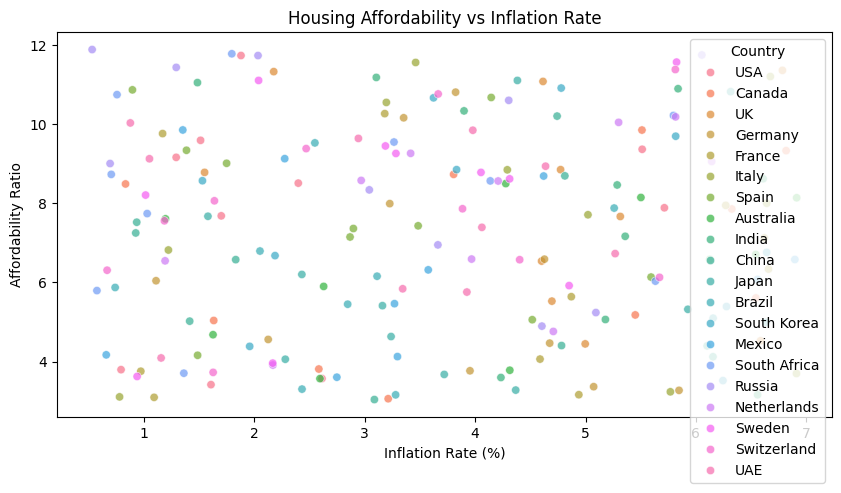

In [44]:
# D. Housing Affordability vs Inflation Trends

plt.figure (figsize = (10,5))
sns.scatterplot (x = df["Inflation Rate (%)"], y = df["Affordability Ratio"], hue = df["Country"], alpha = 0.7)
plt.title ("Housing Affordability vs Inflation Rate")
plt.xlabel ("Inflation Rate (%)")
plt.ylabel ("Affordability Ratio")
plt.legend (title = "Country")
plt.show()

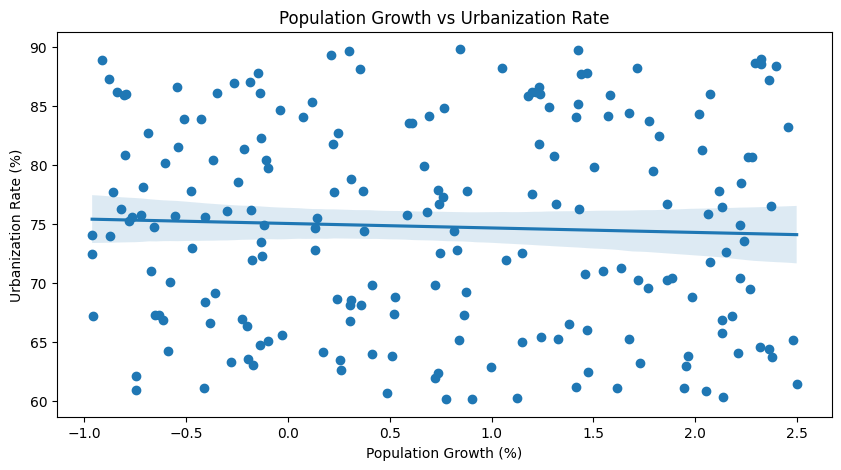

In [47]:
# E. Population Growth Impact on Urbanization

plt.figure (figsize = (10, 5))
sns.regplot (x = df["Population Growth (%)"], y = df["Urbanization Rate (%)"], scatter_kws = {"alpha" : 1})
plt.title("Population Growth vs Urbanization Rate")
plt.xlabel("Population Growth (%)")
plt.ylabel("Urbanization Rate (%)")
plt.show()

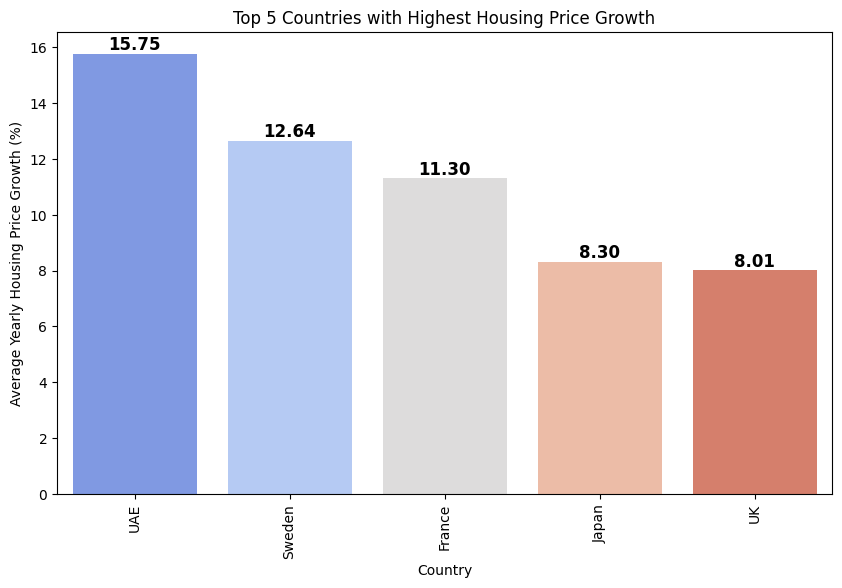

In [53]:
# F. Top 5 Housing Price Growth
# Compute Year-over-Year (YoY) growth for each country
df["YoY_growth"] = df.groupby("Country")["House Price Index"].pct_change() * 100  # Convert to percentage

# Average growth per country
avg_growth = df.groupby("Country")["YoY_growth"].mean().reset_index()

# Select top 5 countries with highest average YoY growth
top_5_countries = avg_growth.nlargest(5, "YoY_growth")

# Create barplot
plt.figure(figsize=(10,6))
ax = sns.barplot(x="Country", y="YoY_growth", hue="Country", data=top_5_countries, palette="coolwarm", legend=False)

# Add number labels to bars
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), ".2f"),  
                (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                ha="center", va="bottom", fontsize=12, fontweight="bold", color="black")

# Labels and title
plt.xlabel("Country")
plt.xticks (rotation = 90)
plt.ylabel("Average Yearly Housing Price Growth (%)")
plt.title("Top 5 Countries with Highest Housing Price Growth")
plt.show()

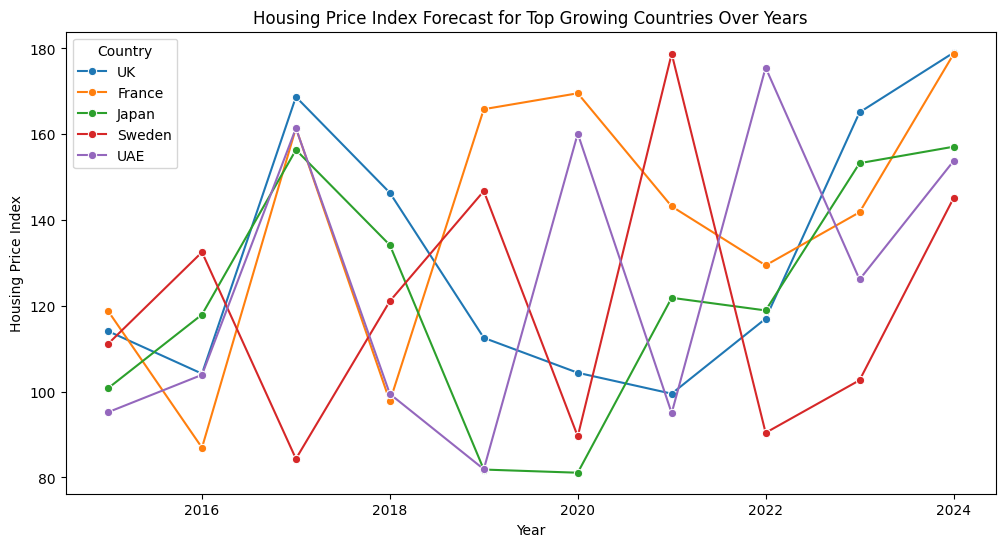

In [62]:
# G. Forecasting Housing Price Index for Multiple Countries Over Years
# Compute YoY growth for each country
df["YoY_growth"] = df.groupby(["Country"])["House Price Index"].pct_change() * 100

# Select relevant years for forecasting
years = sorted(df["Year"].unique())  # Get list of unique years

# Filter top 5 countries with highest average growth
top_countries = df.groupby("Country")["YoY_growth"].mean().nlargest(5).index
df_filtered = df[df["Country"].isin(top_countries)]

# Create visualization
plt.figure(figsize=(12,6))
sns.lineplot(data=df_filtered, x="Year", y="House Price Index", hue="Country", marker="o")

# Labels & Title
plt.xlabel("Year")
plt.ylabel("Housing Price Index")
plt.title("Housing Price Index Forecast for Top Growing Countries Over Years")
plt.legend(title="Country")
plt.show()

# 6. Predictive Modeling (Housing Price Forecasting)

Predictive modeling helps estimate future housing prices using indicators like GDP Growth and Mortgage Rate:

- Linear Regression analyzes relationships and predicts trends based on historical data.

- These forecasts provide actionable insights for investors, policymakers, and homebuyers.

In [67]:
# Step 1: Feature Selection & Train-Test Split

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Selecting important features for price prediction
features = ["GDP Growth (%)", "Inflation Rate (%)", "Mortgage Rate (%)", "Population Growth (%)", "Urbanization Rate (%)"]
target = "House Price Index"

# Splitting data
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [70]:
# Step 2: Train Model & Make Predictions

# Initialize Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Convert predictions into a comma-separated format
print("Housing Price Predictions:", ", ".join(map(str, y_pred[:10])))



Housing Price Predictions: 129.6487674143391, 125.636726593072, 135.65750186292595, 132.30520557122432, 135.17232978977137, 132.29859560736708, 134.7768639706153, 127.65529887943491, 134.03934129268734, 137.75176116537227


In [85]:
# Multi-Country Housing Price Forecast (2025–2030)
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Selecting important features for price prediction
features = ["GDP Growth (%)", "Inflation Rate (%)", "Mortgage Rate (%)", "Population Growth (%)", "Urbanization Rate (%)"]
target = "House Price Index"

# Splitting data
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Generate future data (20 countries, 5 years)
future_years = pd.DataFrame({
    "Country": np.tile(df["Country"].unique()[:20], 6),
    "Year": np.repeat([2025, 2026, 2027, 2028, 2029, 2030], 20),
    "GDP Growth (%)": np.random.uniform(2.0, 3.5, 120),
    "Inflation Rate (%)": np.random.uniform(1.5, 3.0, 120),
    "Mortgage Rate (%)": np.random.uniform(4.0, 5.5, 120),
    "Population Growth (%)": np.random.uniform(1.0, 1.5, 120),
    "Urbanization Rate (%)": np.random.uniform(65, 75, 120)
})

# Predict future housing price index
future_years["Predicted_House_Price_Index"] = model.predict(future_years[features])

# Display results in table format
print(future_years[["Country", "Year", "Predicted_House_Price_Index"]])


         Country  Year  Predicted_House_Price_Index
0            USA  2025                   133.206329
1         Canada  2025                   134.056707
2             UK  2025                   132.610734
3        Germany  2025                   133.093551
4         France  2025                   133.121245
..           ...   ...                          ...
115       Russia  2030                   132.718863
116  Netherlands  2030                   132.560960
117       Sweden  2030                   133.766163
118  Switzerland  2030                   132.954032
119          UAE  2030                   133.165190

[120 rows x 3 columns]


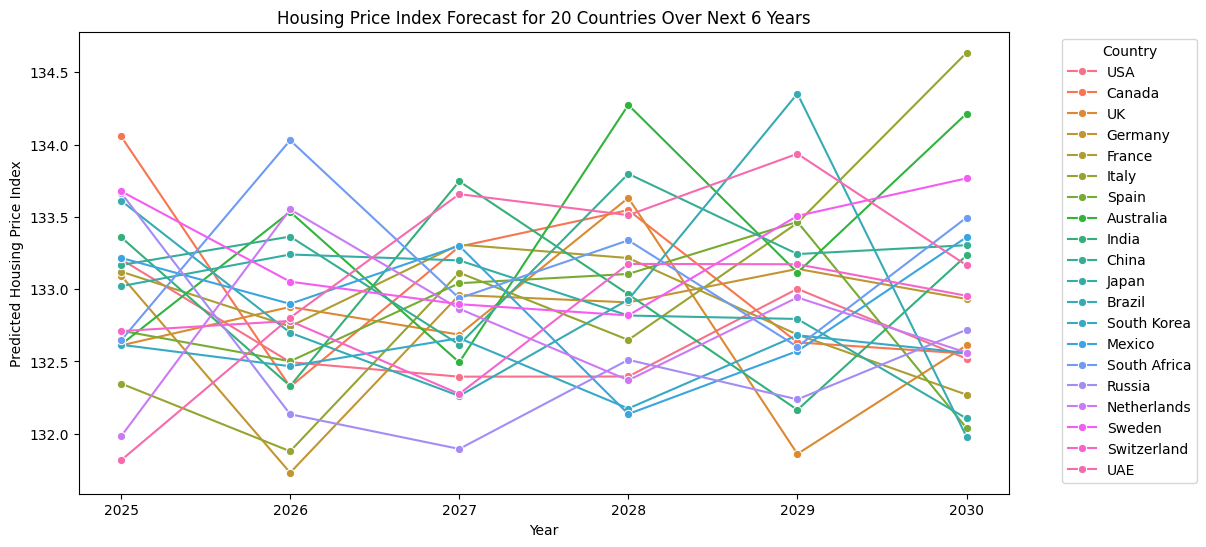

In [93]:
# Visualization
plt.figure(figsize=(12,6))
sns.lineplot(data=future_years, x="Year", y="Predicted_House_Price_Index", hue="Country", marker="o")
plt.xlabel("Year")
plt.ylabel("Predicted Housing Price Index")
plt.title("Housing Price Index Forecast for 20 Countries Over Next 6 Years")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()